<a href="https://colab.research.google.com/github/RahulParajuli/recommendation_system_using_cosine_similarity/blob/main/gameRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game recommendation system

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
games = pd.read_csv("/content/sample_data/game_info.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
games.head()

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0.0,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4.0,88.0,2.0,2.0,0.0,0.0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0.0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2.0,42.0,2.0,0.0,0.0,0.0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0.0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0.0,2.0,2.0,0.0,1.0,0.0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0.0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0.0,1.0,0.0,0.0,0.0,0.0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1.0,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2.0,79.0,0.0,0.0,0.0,0.0


In [6]:
games.columns

Index(['id', 'slug', 'name', 'metacritic', 'released', 'tba', 'updated',
       'website', 'rating', 'rating_top', 'playtime', 'achievements_count',
       'ratings_count', 'suggestions_count', 'game_series_count',
       'reviews_count', 'platforms', 'developers', 'genres', 'publishers',
       'esrb_rating', 'added_status_yet', 'added_status_owned',
       'added_status_beaten', 'added_status_toplay', 'added_status_dropped',
       'added_status_playing'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


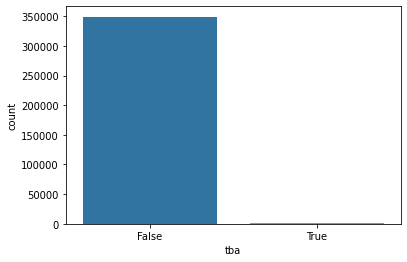

In [7]:
sns.countplot(games['tba'])

In [8]:
games.shape

(350542, 27)

In [9]:
games.describe()

,id,metacritic,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
count,350542.000000,3651.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000,350541.000000
mean,248408.257507,72.743906,0.083609,0.095729,0.223803,2.284275,2.158986,90.889693,0.041379,2.178031,0.714033,11.910070,1.370011,0.385093,0.672994,0.140209
std,125002.052402,11.674367,0.534549,0.600481,5.085285,67.518123,37.373027,116.196049,0.739663,37.683521,9.347626,133.394846,29.324891,8.233105,10.572829,3.860435
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,152782.250000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,253165.500000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,360442.750000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,450408.000000,99.000000,5.000000,5.000000,1600.000000,12322.000000,4289.000000,1839.000000,28.000000,4334.000000,635.000000,8298.000000,3533.000000,2325.000000,1092.000000,644.000000
